<a href="https://colab.research.google.com/github/mnafiulrizki/3333210051_UAS_AnalitikaData_KelasC/blob/main/UAS_Muhammad_Nafiul_Rizki_3333210051_Kelas_C_Analitika_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Nafiul Rizki

NIM : 3333210051

Kelas : C

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Coding diatas digunakan untuk import library yang digunakan
1. Pandas : library yang digunakan untuk membaca dan menulis data dari berbagai format, seperti file CSV, Excel, SQL, dan lainnya. Selain itu, Pandas menyediakan struktur data tingkat tinggi seperti DataFrames, yang memungkinkan Anda untuk melakukan manipulasi, pengolahan, dan transformasi data dengan mudah.
2. NumPy : library yang digunakan untuk komputasi numerik di Python. NumPy sering digunakan dalam pengolahan data numerik, pemodelan matematika, dan algoritma komputasi ilmiah.
3.  Matplotlib : library yang digunakan untuk visualisasi data, seperti bar plot, line plot, scatter plot, histogram.
4. Seaborn : library visualisasi data yang dibangun di atas Matplotlib yang mempermudah tugas visualisasi data, termasuk plot distribusi, plot korelasi, plot regresi, dan sebagainya.
5. Math : libraryh yang menyediakan berbagai fungsi matematika dasar, seperti fungsi trigonometri, logaritma, eksponensial, dan lainnya.
6. Datetime: library yang menyediakan kelas-kelas yang memudahkan manipulasi tanggal dan waktu, seperti membuat objek tanggal dan waktu, melakukan operasi aritmatika pada tanggal dan waktu, memformat tanggal dan waktu dalam berbagai format, dan banyak lagi.
7. %matplotlib inline : perintah untuk menampilkan plot Matplotlib langsung di dalam sel output.

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/akpmpr/updated-netflix-stock-price-all-time

In [ ]:
# https://drive.google.com/file/d/1eu-EMw77oilhoVt9uxSAMiriaU7jCCZQ/view?usp=sharing

!gdown 1eu-EMw77oilhoVt9uxSAMiriaU7jCCZQ

Downloading...
From: https://drive.google.com/uc?id=1eu-EMw77oilhoVt9uxSAMiriaU7jCCZQ
To: /content/netflix.csv
100% 544k/544k [00:00<00:00, 159MB/s]


!gdown merupakan perintah untuk mengunduh file dari Google Drive menggunakan file ID yang diberikan (dapat dilihat pada link file pada drive).

Dataset yang digunakan merupakan data saham Netflix setiap harinya, mulai 23 Mei 2002 sampai 11 Oktober 2021.

In [ ]:
train_data = pd.read_csv('netflix.csv')
train_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


Membuat variabel "train_data" yang berisi perintah "pd.read_csv('netflix.csv')" untuk membaca file CSV dengan nama 'netflix.csv' menggunakan Pandas dan menyimpan datanya ke dalam variabel 'train_data'.

"train_data.head()" merupakan perintah yang digunakan untuk menampilkan beberapa baris pertama dari DataFrame tersebut.

Pada dataset 'netflix.csv' terdapat kolom 'Date' yang merupakan keterangan waktu, 'High' yang merupakan price tertinggi di waktu tersebut, 'Low'  yang merupakan price terendah di waktu tersebut, 'Open'  yang merupakan price awal di waktu tersebut, 'Close'  yang merupakan price akhir di waktu tersebut, 'Volume'  yang merupakan banyakna transaksi di waktu tersebut, dan 'Adj Close'  yang merupakan price paling akhir di waktu tersebut.

Check missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


"train_data.info()" merupakan perintah untuk menghasilkan ringkasan informasi tentang DataFrame "train_data". Informasi yang ditampilkan dapat berupa jumlah baris dan kolom dalam DataFrame, nama kolom dan tipe data setiap kolom, jumlah nilai non-null (non-kosong) dalam setiap kolom, dan memori yang digunakan oleh DataFrame.

Dari "train_data.info()" dapat diketahui bahwa tidak ada missing value karena jumlah non-null pada setiap kolom sama banyaknya.

Check statistic vales for every features

In [ ]:
train_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03,4881.000000
mean,107.003361,103.742674,105.388477,105.434149,1.679949e+07,105.434149
std,159.326383,154.662309,157.007060,157.073188,1.936794e+07,157.073188
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.977143,3.838571,3.901429,3.906429,6.286300e+06,3.906429
50%,22.261429,21.150000,21.524286,21.632856,1.082310e+07,21.632856
75%,127.430000,123.589996,125.949997,125.389999,2.015640e+07,125.389999
max,646.840027,630.859985,642.229980,639.099976,3.234140e+08,639.099976


"train_data.describe()" merupakan perintah untuk menghasilkan ringkasan statistik deskriptif dari DataFrame train_data.

1. count: Jumlah nilai non-null (non-kosong) dalam setiap kolom.
2. mean: Rata-rata nilai dalam setiap kolom.
3. std Deviation: Standar deviasi nilai dalam setiap kolom.
4. min: Nilai terendah dalam setiap kolom.
5. 25%, 50% (median), 75%: Persentil ke-25, median, dan persentil ke-75 dari nilai dalam setiap kolom.
6. max: Nilai tertinggi dalam setiap kolom.

Handle datetime data for time series

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


"train_data['Date'] = pd.to_datetime(train_data['Date'])" : Pada langkah ini, kolom 'Date' dalam DataFrame 'train_data' diubah menjadi tipe data datetime menggunakan fungsi 'pd.to_datetime()'

"train_data.set_index('Date', inplace=True)" : Pada langkah ini, kolom 'Date' digunakan sebagai indeks DataFrame dengan menggunakan metode 'set_index()'

"train_data.head()" : Perintah ini digunakan untuk menampilkan beberapa baris pertama dari DataFrame 'train_data' yang telah mengalami perubahan.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

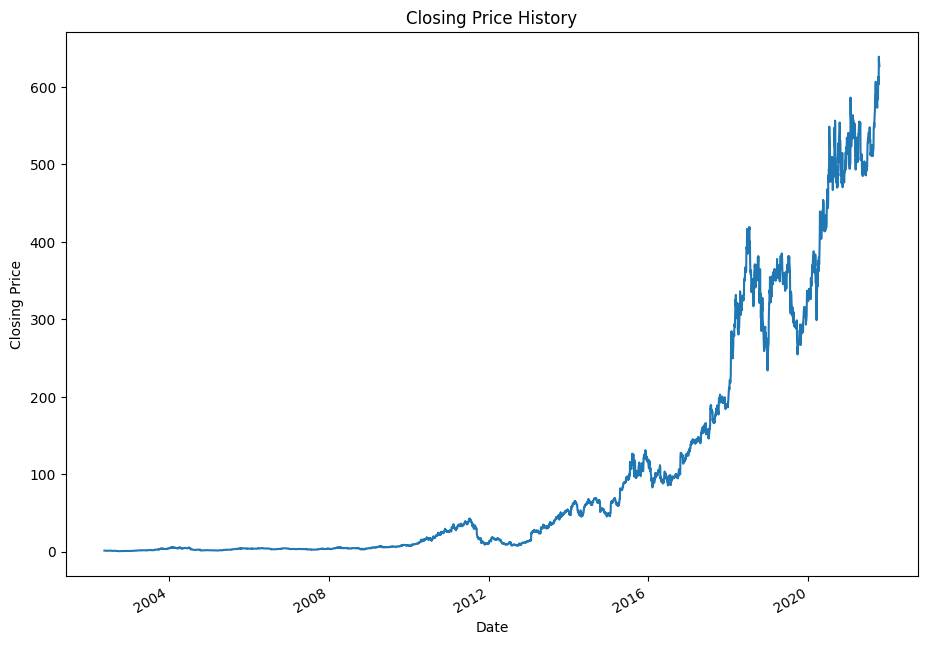

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

"plt.figure(figsize=(11, 8))" : perintah untuk membuat sebuah objek gambar dengan ukuran 11x8 inch menggunakan 'plt.figure()'.

"train_data['Adj Close'].plot()" : perintah untuk memplot data dari kolom 'Adj Close' dalam DataFrame 'train_data' menggunakan metode 'plot()'. Ini akan menghasilkan sebuah garis atau grafik yang mewakili perubahan harga penutupan dari waktu ke waktu.

"plt.title('Closing Price History')": perintah untuk memberikan judul pada grafik menggunakan 'plt.title()'. Judul grafik akan menjadi 'Closing Price History'.

"plt.xlabel('Date')" : perintah untuk memberikan label pada sumbu x (horizontal) menggunakan 'plt.xlabel()'. Label sumbu x akan menjadi 'Date', yang menunjukkan tanggal.

"plt.ylabel('Closing Price')" : perintah untuk memberikan label pada sumbu y (vertikal) menggunakan 'plt.ylabel()'. Label sumbu y akan menjadi 'Closing Price', yang menunjukkan harga penutupan.

"plt.show()": perintah untuk menampilkan grafik yang telah dibuat menggunakan 'plt.show()'.

Grafik diatas merupakan data historical untuk closing price dari 23 Mei 2002 sampai 11 Oktober 2021 dengan pola data trend naik.  

<Figure size 1600x800 with 0 Axes>

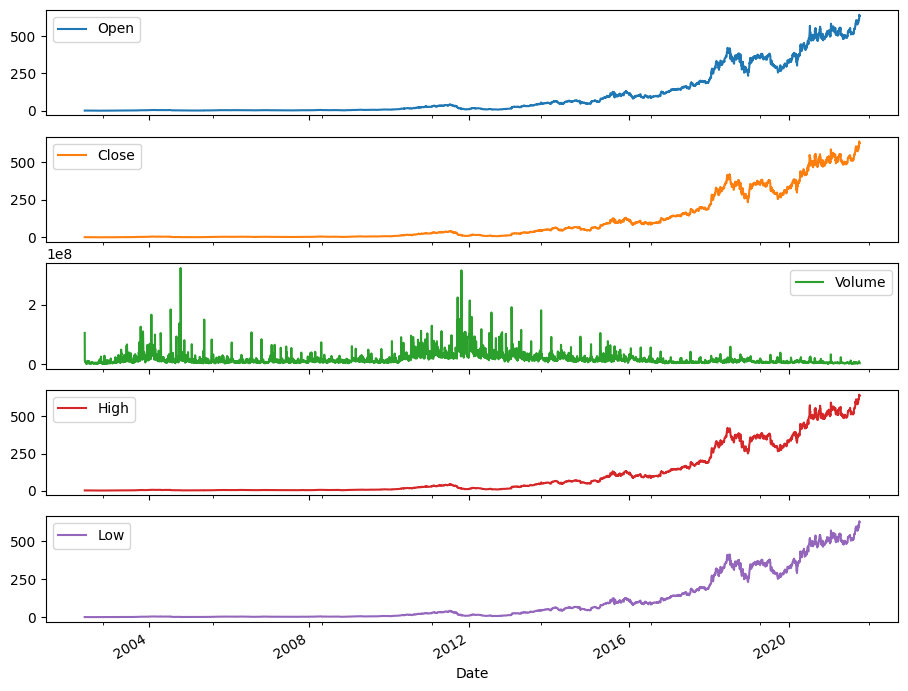

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

"plt.figure(figsize=(16, 8))" : perintah untuk membuat sebuah objek gambar dengan ukuran 16x8 inch menggunakan 'plt.figure()'.

"cols = ['Open', 'Close', 'Volume', 'High', 'Low']" : perintah untuk membuat sebuah list dengan nama 'cols' yang berisi kolom-kolom yang ingin ditampilkan dalam grafik. Dalam hal ini, kolom-kolom yang dipilih adalah 'Open', 'Close', 'Volume', 'High', dan 'Low'.

"axes = train_data[cols].plot(figsize=(11, 9), subplots=True)" : perintah untuk memplot data dari kolom-kolom yang telah dipilih dalam DataFrame 'train_data' menggunakan metode 'plot()'. Dengan mengatur 'subplots=True', grafik akan ditampilkan dalam beberapa subplot terpisah, di mana setiap subplot akan mewakili satu kolom dari DataFrame.

"plt.show()" : Pada langkah ini, Anda menampilkan grafik yang telah dibuat menggunakan 'plt.show()'.

Dari gambar diatas dapat diketahui grafik Open Price, Close Price, High Price, dan Low Price dengan pola data trend naik hingga tahun 2021. Sedangkan untuk Volume grakfiknya stasioner.

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

"train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0" : menambahkan kolom baru 'HL_PCT' ke dalam DataFrame 'train_data'. Kolom ini menghitung persentase perubahan antara harga tertinggi ('High') dan harga terendah ('Low') dalam satu periode tertentu. Perhitungan dilakukan dengan membagi selisih harga tertinggi dan terendah dengan harga terendah, kemudian dikalikan dengan 100.0 untuk mengubahnya menjadi persentase.

"train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0" : menambahkan kolom baru dengan nama 'PCT_change' ke dalam DataFrame train_data. Kolom ini menghitung persentase perubahan antara harga penutupan ('Close') dan harga pembukaan ('Open') dalam satu periode tertentu. Perhitungan dilakukan dengan membagi selisih harga penutupan dan pembukaan dengan harga pembukaan, kemudian dikalikan dengan 100.0 untuk mengubahnya menjadi persentase.

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

"df = train_data[['HL_PCT', 'PCT_change', 'Adj Close', 'Volume']]" : menyimpan DataFrame yang terdiri dari kolom-kolom yang telah dipilih ke dalam variabel df. DataFrame ini akan berisi data dari kolom-kolom yang dipilih dari train_data.

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

245


<ipython-input-12-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


"forecast_out = int(math.ceil(0.05 * len(df)))" : menghitung jumlah baris data yang akan diprediksi berdasarkan persentase tertentu dari total baris dalam DataFrame df, dengan mengalikan 0.05 (persentase 5%) dengan panjang DataFrame 'df', kemudian menggunakan fungsi 'math.ceil()' untuk membulatkan ke atas ke bilangan bulat terdekat. Hasilnya disimpan dalam variabel 'forecast_out'.

"print(forecast_out)" : mencetak nilai dari forecast_out untuk menampilkan jumlah baris data yang akan diprediksi.

"df['label'] = df['Adj Close'].shift(-forecast_out)" : menambahkan kolom baru dengan nama 'label' ke dalam DataFrame 'df'. Kolom ini berisi nilai dari kolom 'Adj Close' yang digeser (shifted) ke atas sebanyak 'forecast_out' baris. Dengan kata lain, nilai 'Adj Close' pada baris i akan menjadi nilai 'label' pada baris 'i-forecast_out'. Hal ini dimaksudkan untuk menandai nilai target atau label yang akan diprediksi dalam analisis atau pemodelan selanjutnya.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

"from sklearn.preprocessing import StandardScaler" : Modul 'StandardScaler' digunakan untuk melakukan penskalaan fitur pada data.

"from sklearn.linear_model import LinearRegression, Ridge" : Modul 'LinearRegression' dan 'Ridge' digunakan untuk melatih dan menerapkan model regresi linier. Regresi linier adalah metode statistik untuk memodelkan hubungan linier antara variabel dependen dan satu atau lebih variabel independen.

"from sklearn.ensemble import RandomForestRegressor" : Modul 'RandomForestRegressor' digunakan untuk melatih dan menerapkan model regresi menggunakan algoritma 'Random Forest'. Random Forest adalah metode ensambel yang menggabungkan beberapa pohon keputusan untuk melakukan prediksi.

"from sklearn.svm import SVR: Modul SVR (Support Vector Regression)" digunakan untuk melatih dan menerapkan model regresi dengan menggunakan metode 'Support Vector Machines (SVM)'. SVM adalah metode pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi.

"from sklearn.model_selection import train_test_split" : Modul 'train_test_split' digunakan untuk membagi dataset menjadi subset pelatihan dan subset pengujian.

"from sklearn.metrics import mean_squared_log_error" : Modul 'mean_squared_log_error' digunakan untuk menghitung metrik evaluasi yang disebut 'mean squared log error (MSLE)'. Metrik ini biasanya digunakan dalam masalah regresi di mana variabel target memiliki distribusi yang luas dan perlu dilogaritmikkan sebelum dihitung kesalahan.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-14-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


"scaler = StandardScaler()" : membuat variabek 'scaler' yang berisi perintah untuk mendeklarasikan objek 'StandardScaler' yang digunakan untuk melakukan normalisasi data.

"X = np.array(df.drop(['label'], 1))" : membuat variabel X yang berisi perintah untuk mengambil fitur-fitur dari dataframe df kecuali kolom 'label'.

"scaler.fit(X)" : perintah untuk mempelajari objek 'scaler'

"X = scaler.transform(X)" : data pada variabel X yang asli dinormalisasi dengan menggunakan metode 'transform(X)' dari objek 'scaler'.

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

"X_Predictions = X[-forecast_out:]" : mengambil 'forecast_out' baris terakhir dari data 'X' dan menetapkannya ke variabel 'X_Predictions' yang digunakan untuk melakukan prediksi pada data masa depan yang belum diketahui nilai-nilainya.

"X = X[:-forecast_out]" : mengambil semua baris kecuali 'forecast_out' baris terakhir dari data 'X' dan menetapkannya kembali ke variabel 'X'. Ini berarti 'X' akan berisi data yang akan digunakan untuk melatih model. Data ini digunakan untuk melatih model prediksi berdasarkan data yang telah ada sebelumnya.

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-16-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


"df.dropna(inplace=True)" : perintah yang digunakan untuk menghapus baris dengan nilai yang hilang (NaN) dari DataFrame. 'inplace=True' digunakan untuk memperbarui DataFrame 'df' secara langsung dengan menghapus baris yang mengandung nilai yang hilang.

"y = np.array(df['label'])" : perintah yang digunakan unutuk membuat array y yang berisi nilai dari kolom 'label' dalam DataFrame 'df'. Dalam hal ini, kolom 'label' dianggap sebagai target atau variabel dependen yang ingin diprediksi atau dianalisis dalam konteks pemodelan.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Coding diatas digunakan untuk pemisahan data menjadi data latih (training data) dan data uji (testing data) menggunakan metode 'train_test_split'.

Dari coding tersebut dapat diketahui 'test_size=0.2' atau data test sebanyak 20% yang berarti sebanyak 80% digunakan sebagai data training.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

"lr = LinearRegression()" : membuat objek model regresi linear dengan menggunakan kelas 'LinearRegression'.

"lr.fit(X_train, y_train)" : melatih model regresi linear (lr) menggunakan data latih (X_train dan y_train).

"lr_confidence = lr.score(X_test, y_test)" : menghitung skor kepercayaan (lr_confidence) dari model regresi linear pada data uji (X_test dan y_test) dengan menggunakan metode score(). Skor kepercayaan memberikan informasi tentang tingkat akurasi model dalam menjelaskan variasi dalam data uji. Semakin tinggi skor kepercayaan, semakin baik model dalam menjelaskan data.








In [ ]:
lr_confidence

0.9087170518446659

Coding diatas digunakan untuk mengetahui skor kepercayaan dengan model linier regression

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

"rf = RandomForestRegressor()" : membuat objek model 'RandomForestRegressor' menggunakan kelas 'RandomForestRegressor'.

"rf.fit(X_train, y_train)" : melatih model RandomForestRegressor (rf) menggunakan data latih (X_train dan y_train).

"rf_confidence = rf.score(X_test, y_test)" : menghitung skor kepercayaan (rf_confidence) dari model RandomForestRegressor pada data uji (X_test dan y_test) dengan menggunakan metode score().

In [ ]:
rf_confidence

0.966229059978523

Coding diatas digunakan untuk mengetahui skor kepercayaan dengan model random forest

Dikarenakan confidence scor untuk random forest lebih tinggi dibanding linier regression, maka selanjutnya dilakukan forecasting dengan menggunakan random forest.

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-24-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-24-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-24-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

"last_date = df.index[-1]" : mengambil tanggal terakhir dalam indeks DataFrame df dan menyimpannya dalam variabel 'last_date'.

"last_unix = last_date.timestamp()" : mengonversi last_date menjadi waktu UNIX (dalam detik) dan menyimpannya dalam variabel 'last_unix'.

"one_day = 86400" : menetapkan nilai 86400 kepada variabel 'one_day', yang mewakili jumlah detik dalam satu hari.

"next_unix = last_unix + one_day" : menghitung waktu UNIX berikutnya dengan menambahkan 'one_day' ke 'last_unix' dan menyimpannya dalam 'next_unix'. Ini akan menjadi waktu untuk data prediksi berikutnya.

"forecast_set = rf.predict(X_Predictions)" : Baris ini menggunakan model RandomForestRegressor (rf) untuk melakukan prediksi pada X_Predictions (data yang akan diprediksi) dan menyimpan hasil prediksi dalam 'forecast_set'.

"df['Forecast'] = np.nan" : menambahkan kolom baru dengan nama 'Forecast' ke dalam DataFrame 'df' dan menginisialisasinya dengan nilai NaN (not a number).

"for i in forecast_set:" : memulai loop for untuk setiap nilai dalam 'forecast_set'.

"next_date = datetime.datetime.fromtimestamp(next_unix)" : mengonversi 'next_unix' menjadi objek datetime dan menyimpannya dalam 'next_date'. Ini mewakili tanggal untuk data prediksi berikutnya.

"next_unix += 86400" : menambahkan one_day (86400 detik) ke 'next_unix' untuk mengupdate nilai 'next_unix' menjadi waktu UNIX untuk data prediksi berikutnya.

"df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]" : menetapkan nilai NaN ke semua kolom DataFrame 'df' (kecuali kolom 'Forecast') pada 'next_date' dan menetapkan nilai prediksi i ke kolom 'Forecast' pada 'next_date'. Dengan demikian, data prediksi ditambahkan ke DataFrame 'df' pada tanggal 'next_date'.

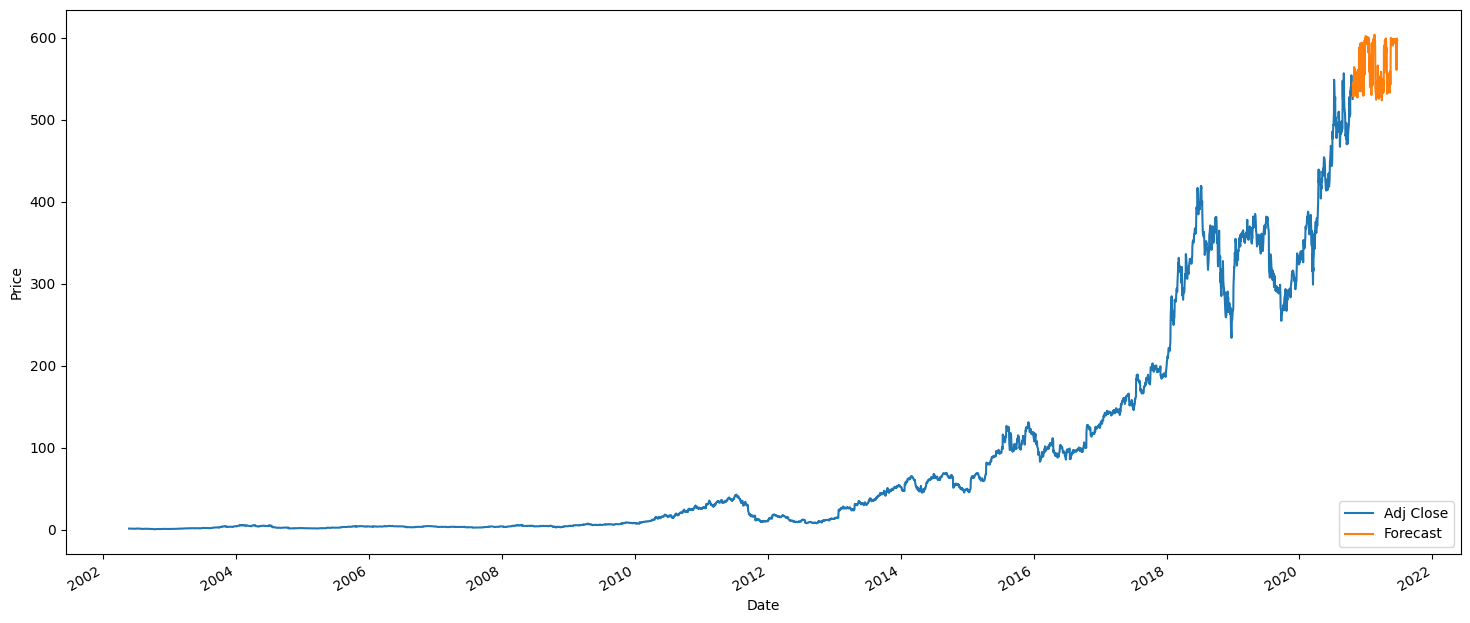

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

"plt.figure(figsize=(18, 8))" : Baris ini membuat sebuah objek gambar dengan ukuran (figsize) 18x8 inci.

"df['Adj Close'].plot()" : memplot kolom 'Adj Close' dari DataFrame 'df' menggunakan metode 'plot()' yang akan menghasilkan garis plot yang mewakili perubahan harga penutup yang disesuaikan dari waktu ke waktu.

"df['Forecast'].plot()" : memplot kolom 'Forecast' dari DataFrame 'df' menggunakan 'metode plot()'yang akan menghasilkan garis plot yang mewakili hasil prediksi dari model untuk setiap tanggal yang sesuai.

"plt.legend(loc=4)" : menambahkan 'legend' ke plot. 'Legend' ini akan menunjukkan keterangan untuk masing-masing garis plot yang ada dalam grafik.

"plt.xlabel('Date')" : menetapkan label sumbu x (horizontal) pada plot sebagai 'Date' yang akan menunjukkan tanggal.

"plt.ylabel('Price')" : menetapkan label sumbu y (vertikal) pada plot sebagai 'Price' yang akan menunjukkan harga.

"plt.show()" : menampilkan plot yang telah dibuat.

Dari gambar diatas dapat diketahui hasil forecasting untuk beberapa waktu kedepan dengan menggunakan data historical dari tanggal 23 Mei 2002 sampai 11 Oktober 2021 yang dapat ditunjukkan oleh grafik dengan garis berwarna oren yang dimana hasil forecastingnya mengalami peningkatan.





